In [10]:
import pandas as pd
import numpy as np

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn import tree

In [13]:
from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>"
HTML(style)

In [14]:
titanic_data = pd.read_csv('D:\\AnacondaData\\titanic.csv')

In [15]:
# Смотрим датасет
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
# Проверяем на пропуски NaN, т.к. дерево решений не работает с пропусками в данных
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [17]:
# Численно определяем сколько пропусков
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
X = titanic_data.drop(['PassengerId','Survived','Name','Ticket','Cabin'], axis=1)
y = titanic_data.Survived

In [19]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [20]:
# У нас в фичах текст и числа, применяем get_dummies для преобразования слов в значения
X = pd.get_dummies(X)

In [21]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [22]:
# Заменяем пропуски медианным возрастом пассажиров 
X = X.fillna({'Age': X.Age.median()})

In [23]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Методом train_test_split разбиваем датафрейм Х и y на train и test в пропорции 0.33 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [19]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
clf_new = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [21]:
clf_new.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
# Элементарная оценка по числу правильных ответов
clf_new.score(X_train,y_train)

0.8406040268456376

In [23]:
clf_new.score(X_test,y_test)

0.8101694915254237

In [24]:
max_depth_values = range(1,100)

In [25]:
scores_data = pd.DataFrame()

In [26]:
for max_depth in max_depth_values:
    clf_range = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf_range.fit(X_train, y_train)
    train_score = clf_range.score(X_train, y_train)
    test_score = clf_range.score(X_test, y_test)
    
    temp_score_data = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score]})
    
    scores_data = scores_data.append(temp_score_data)

In [27]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.781879,0.796610
0,2,0.805369,0.776271
0,3,0.823826,0.820339
0,4,0.833893,0.823729
0,5,0.840604,0.810169


In [28]:
#0. Мы перебрали в цикле максимальную глубину от 1 до 100 и для каждого значения 
#добавили в датафрейм точность на тренировочной и тестовой выборке - в итоге у нас есть 3 колонки.

#1. Задача - изобразить на графике зависимость точности от глубины, и сделать это 
#двумя линиями (train и test), если делать это на листе бумаги - проблем для человека 
#вообще нет(даже если одна из линий нужна в форме котеночка), но мы выбираем такую функцию pandas, 
#которой можем скормить x и только один y.

#2. Нужно преобразовать scores_data так, чтобы для каждой строки были созданы 2 новые: 
#одна со значением точности на тренировочных данных, другая на тестовых. 
#В новом scores_data_long (он long, потому что в нем в два раза больше строк) 
#останется колонка max_depth, которую мы будем использовать как x и появится всего 
#одна колонка score, которую будем использовать как y. Дополнительная третья колонка 
#set_type разделит строки для отрисовки двух линий.

In [29]:
scores_data_long = pd.melt(scores_data, id_vars = ['max_depth'], 
                           value_vars = ['train_score','test_score'], var_name = 'set_type', 
                           value_name = 'score')

In [30]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604


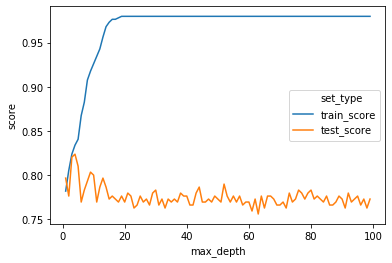

In [31]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)

In [32]:
#Перебирая различную глубину дерева на один и тех же тестовых данных, 
#мы не решаем проблему переобучения. Исправить ситуацию поможет  кросс-валидация (перекрестная проверка), 
#разбивающая данные на тренировочную выборку для обучения, валидирующее множество 
#для подбора оптимальных параметров и тестовые данные для финального замера точности.

#Что мы делаем:

#1. Разделяем данные (X_train, y_train) на 5 частей, чтобы одну часть(всегда разную) использовать как тестовые данные,
# а остальные 4 как тренировочные. 
# Получится, что каждый кусок данных будет использован и в обучении, и в тесте. 
# Для каждой модели усредним accuracy на подвыборках, чтобы потом использовать 
# как единый показатель точности для сравнения разных моделей.

#clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
#from sklearn.model_selection import cross_val_score
#cross_val_score(clf, X_train, y_train , cv=5) # array([0.74166667, 0.8     , 0.75630252, 0.79831933, 0.74576271])
#cross_val_score(clf, X_train, y_train , cv=5).mean() # 0.7734524996439254

#2.  Возвращаемся к работе с циклом для поиска оптимальной глубины и добавляем в scores_data среднюю точность 
#на кросс-валидации. (чтобы не было путаницы в одном ноутбуке переименуем  scores_data в cross_val_scores_data)

In [33]:
# Создадим еще один классификатор с глубиной дерева 4, без ренджа и применил кросс-валидацию
clf_cross = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
# ПЯТЬ полученных значений это точность которую показал классификатор, разбив X_train и y_train на 5 равных кусочков
cross_val_score(clf, X_train, y_train , cv=5)

array([0.74166667, 0.78151261, 0.75630252, 0.81512605, 0.77310924])

In [36]:
# Средняя точность будет
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7752100840336134

In [37]:
# Прогоним через рендж с кросс-валидацией

scores_data_cross = pd.DataFrame()

In [38]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score_cross = clf.score(X_train, y_train)
    test_score_cross = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train , cv=5).mean()
    
    temp_score_data_cross = pd.DataFrame({'max_depth': [max_depth], 
                                          'train_score': [train_score_cross], 
                                          'test_score': [test_score_cross],
                                          'cross_val_score': [mean_cross_val_score]})
    
    scores_data_cross = scores_data_cross.append(temp_score_data_cross)

In [39]:
scores_data_cross.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.797031


In [40]:
# 3. В результате получим датафрейм с колонкой  max_depth и тремя  score, 
# аналогично шагу 3 этого урока, используя функцию melt, преобразуем данные и построим график:

In [41]:
scores_data_cross_long = pd.melt(scores_data_cross, id_vars=['max_depth'], 
                                 value_vars=['train_score', 'test_score', 'cross_val_score'],
                                  var_name='set_type', value_name='score')

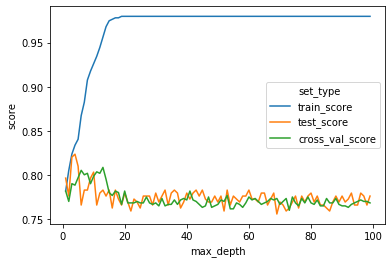

In [42]:
sns.lineplot(x="max_depth", y="score", hue="set_type", data=scores_data_cross_long)

In [43]:
#4. Смотрим на зеленую линию (cross_val_score ). На графике ясно видно, 
# что максимум приходится на глубине до 20. более точное значение максимальной глубины дерева поможет определить

In [44]:
scores_data_cross_long.query("set_type == 'cross_val_score'").head()

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031


In [45]:
# максимальное значение cross_val_score достигается при max_depth = 14 
scores_data_cross_long.query("set_type == 'cross_val_score'").head(20)

,max_depth,set_type,score
198,1,cross_val_score,0.781961
199,2,cross_val_score,0.770196
200,3,cross_val_score,0.790322
201,4,cross_val_score,0.788627
202,5,cross_val_score,0.797031
203,6,cross_val_score,0.805434
204,7,cross_val_score,0.800378
205,8,cross_val_score,0.802045
206,9,cross_val_score,0.790266
207,10,cross_val_score,0.798669


In [46]:
a = scores_data_cross_long.query("set_type == 'cross_val_score'").head(20)

In [47]:
a.max()

max_depth                 20
set_type     cross_val_score
score               0.808754
dtype: object

In [48]:
# Прогоним теперь на тестовых данных наш классификатор с лучшим значением глубины - 14 или 8

best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)

In [49]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [50]:
cross_val_score(clf, X_train, y_train , cv=5).mean()

0.7735434173669468

In [51]:
best_clf.score(X_test, y_test)

0.8033898305084746

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
grid_clf = tree.DecisionTreeClassifier()

In [54]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1,30)}

In [55]:
grid_search_cv_clf = GridSearchCV(grid_clf, parametrs, cv=5)

In [56]:
grid_search_cv_clf

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [57]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                   

In [58]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 12}

In [59]:
new_best_clf = grid_search_cv_clf.best_estimator_

In [60]:
new_best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
new_best_clf.score(X_test, y_test)

0.7728813559322034

In [62]:
from sklearn.metrics import precision_score, recall_score

In [65]:
# ПРЕДСКАЗЫВАЕМ НА ТЕСТЕ!!!!!!!!!!!!!!!!!!
y_pred = new_best_clf.predict(X_test)

In [66]:
# Определим точность
precision_score(y_test, y_pred)

0.7476635514018691

In [67]:
# Определим полноту
recall_score(y_test, y_pred)

0.6666666666666666

In [68]:
y_predicted_prob = new_best_clf.predict_proba(X_test)

In [69]:
# Посмотрим предсказанную вероятность. Это двумерный массив, гду для каждого пассажира предсказано 
# отнесение его к классу выживших или погибших
y_predicted_prob

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.80952381, 0.19047619],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.16666667, 0.83333333],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [0.6       , 0.4       ],
       [0.80952381, 0.19047619],
       [0.93877551, 0.06122449],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

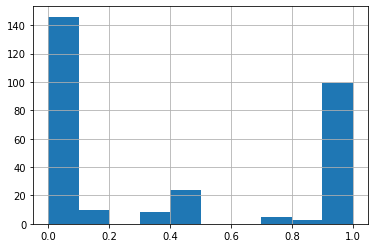

In [70]:
# Посмотрим распределение положительного класса (т.е. второй колонки)
pd.Series(y_predicted_prob[:, 1]).hist()

In [71]:
# По умолчанию дерево распределяет (классифицирует) по значению >0,5. А если мы хотим повысить точность? 
# Используем np.where и установим порог определения на 0,8. Тогда отнесение к классу 0 или 1 примет вид:
np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0])

In [72]:
y_pred_new = np.where(y_predicted_prob[:, 1] > 0.8, 1, 0)

In [73]:
# Определим точность с учетом увеличенного параметра 0,8
precision_score(y_test, y_pred_new)

0.7647058823529411

In [74]:
# Точность повысилась, но полнота уменьшилась
recall_score(y_test, y_pred_new)

0.65

In [75]:
# По полученным значения Точности и Полноты построим ROC кривую

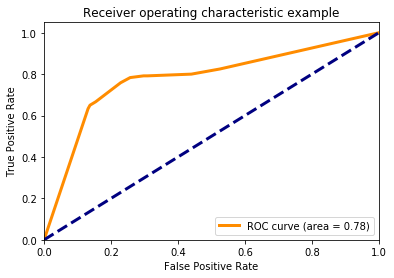

In [76]:
from sklearn.metrics import roc_curve, auc
lw = 3
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [77]:
# Основные понятия  по теме дерево решений

#Entropy and Information gain ﻿
#Train / test split ﻿
#K-fold cross-validation ﻿
#Hyper parameters and Grid search ﻿

# Дерево решений - алгоритм машинного обучения для регрессии и классификации. 
# Остановимся подробнее на задаче классификатора. В процессе построения дерева выбираются переменные, 
# разделение по которым позволяет нам с большей точностью разделять исследуемые классы. 
# В каждом листе дерева находится одно условие, которое разбивает наш набор данных на два подмножества.

# Процесс выбора фичей, которые помещаются в лист дерева основывается на расчете Information gain. 
# Могут использоваться и другие критерии.

# По умолчанию классификатор строит настолько глубокое дерево, насколько позволяет набор данных. 
# Таким образом, классификатор преследует цель безошибочно отнести к нужному классу все объекты в выборке. 
# Такой "жадный" алгоритм может приводить к переобучению в результате избыточной глубины дерева.

# Проверить насколько сильно переобучен классификатор можно обучив его на обучающей выборке затем проверить 
# качество модели на тестовой выборке.
# Основная цель построения любой модели - получить классификатор с максимальной обобщающей способностью, 
# т.е. такой классификатор, который успешно выделяет общие закономерности и не переобучается 
# на частных закономерностях в конкретной выборке.

# Для этой цели мы подбираем оптимальный набор параметров классификатора, в случае дерева решений - 
# это может быть глубина дерева. Для выбора оптимального параметра можно построить множество деревьев 
# с разной глубиной и выбрать наилучший результат.

# В качестве критерия "наилучшего" классификатора можно использовать кросс-валидацию. 
# При таком подходе данные в выборке разбиваются на n частей, например на 5 частей, 
# далее классификатор обучается на 4 частях данных и валидируется на оставшейся 5ой части. 
# Затем операция повторяется, чтобы каждая из 5 частей данных оказалась в роли тестового множества.

In [78]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier

In [79]:
clf_rf = RandomForestClassifier()

In [84]:
parametrs = {'n_estimators': [10,20,30], 'max_depth': [2,5,7,10]}

In [85]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)

In [86]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [87]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'n_estimators': 30}

In [88]:
best_rf_clf = grid_search_cv_clf.best_estimator_

In [89]:
best_rf_clf.score(X_test, y_test)

0.8067796610169492

In [90]:
feature_importances = best_rf_clf.feature_importances_

In [91]:
feature_importances

array([0.13970389, 0.10474116, 0.03590291, 0.04075457, 0.12020423,
       0.25679259, 0.24766626, 0.02548949, 0.01113117, 0.01761373])

In [92]:
feature_importances_df = pd.DataFrame({'features': list(X_train),
                                    'feature_importances': feature_importances})

In [95]:
feature_importances_df.sort_values('feature_importances')

,features,feature_importances
8,Embarked_Q,0.011131
9,Embarked_S,0.017614
7,Embarked_C,0.025489
2,SibSp,0.035903
3,Parch,0.040755
1,Age,0.104741
4,Fare,0.120204
0,Pclass,0.139704
6,Sex_male,0.247666
5,Sex_female,0.256793


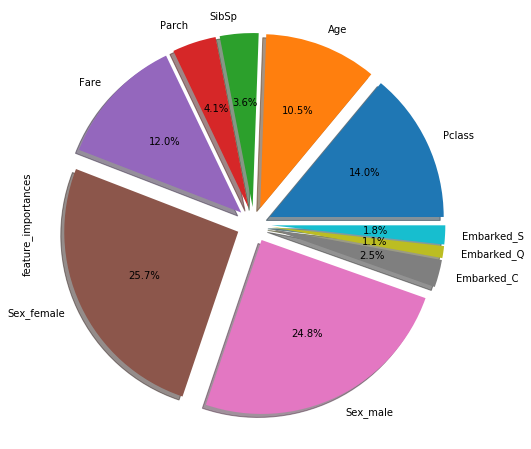

In [96]:
feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(8, 8));